In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [153]:
df = pd.read_csv('avocado.csv')

In [9]:
df.head(100)

Unnamed: 0        Date  AveragePrice  Total Volume       4046       4225  \
0            0  2015-12-27          1.33      64236.62    1036.74   54454.85   
1            1  2015-12-20          1.35      54876.98     674.28   44638.81   
2            2  2015-12-13          0.93     118220.22     794.70  109149.67   
3            3  2015-12-06          1.08      78992.15    1132.00   71976.41   
4            4  2015-11-29          1.28      51039.60     941.48   43838.39   
..         ...         ...           ...           ...        ...        ...   
95          43  2015-03-01          0.99     512532.44  441544.00   21183.70   
96          44  2015-02-22          1.10     431308.56  369316.29   18324.76   
97          45  2015-02-15          1.06     427391.28  364446.77   17420.41   
98          46  2015-02-08          1.03     433883.91  377256.38   17162.50   
99          47  2015-02-01          0.96     636771.37  553198.56   31583.38   

      4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0    48.16     8696.87     8603.62       93.25         0.00  conventional   
1    58.33     9505.56     9408.07       97.49         0.00  conventional   
2   130.50     8145.35     8042.21      103.14         0.00  conventional   
3    72.58     5811.16     5677.40      133.76         0.00  conventional   
4    75.78     6183.95     5986.26      197.69         0.00  conventional   
..     ...         ...         ...         ...          ...           ...   
95  347.78    49456.96    32180.90    17273.38         2.68  conventional   
96  237.47    43430.04    33423.74    10006.30         0.00  conventional   
97  638.18    44885.92    26727.66    18158.26         0.00  conventional   
98  524.85    38940.18    18044.41    20895.77         0.00  conventional   
99  294.94    51694.49    10553.73    41140.76         0.00  conventional   

    year   region  
0   2015   Albany  
1   2015   Albany  
2   2015   Albany  
3   2015   Albany  
4   2015   Albany  
..   ...      ...  
95  2015  Atlanta  
96  2015  Atlanta  
97  2015  Atlanta  
98  2015  Atlanta  
99  2015  Atlanta  

[100 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [63]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [167]:
onehot = pd.get_dummies(df['type'])

In [168]:
df = pd.concat([df, onehot], axis=1)

In [169]:
df.drop(["type"], axis =1, inplace=True)

In [87]:
onehot_r = pd.get_dummies(df['region'])

In [88]:
df = pd.concat([df, onehot_r], axis=1)

In [89]:
df.drop(["region"], axis =1, inplace=True)

In [66]:
df["Date"].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [67]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [68]:
df["XLarge Bags"].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [69]:
df = df.drop(["Unnamed: 0", "XLarge Bags"], axis = 1)

## 날짜 전처리

In [70]:
date_split = df["Date"].str.split("-")
df["year"] = date_split.str.get(0)
df["mon"] = date_split.str.get(1)
df["dt"] = date_split.str.get(2)

In [71]:
date_split

0        [2015, 12, 27]
1        [2015, 12, 20]
2        [2015, 12, 13]
3        [2015, 12, 06]
4        [2015, 11, 29]
              ...      
18244    [2018, 02, 04]
18245    [2018, 01, 28]
18246    [2018, 01, 21]
18247    [2018, 01, 14]
18248    [2018, 01, 07]
Name: Date, Length: 18249, dtype: object

In [90]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  year  mon  ...  SouthCarolina  SouthCentral  \
0     8603.62       93.25  2015   12  ...              0             0   
1     9408.07       97.49  2015   12  ...              0             0   
2     8042.21      103.14  2015   12  ...              0             0   
3     5677.40      133.76  2015   12  ...              0             0   
4     5986.26      197.69  2015   11  ...              0             0   

   Southeast  Spokane  StLouis  Syracuse  Tampa  TotalUS  West  \
0          0        0        0         0      0        0     0   
1          0        0        0         0      0        0     0   
2          0        0        0         0      0        0     0   
3          0        0        0         0      0        0     0   
4          0        0        0         0      0        0     0   

   WestTexNewMexico  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 67 columns]

In [73]:
df['year'] = df['year'].astype('int')

In [74]:
df['mon'] = df['mon'].astype('int')

In [75]:
df['dt'] = df['dt'].astype('int')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
 11  mon           18249 non-null  int64  
 12  dt            18249 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 1.8+ MB


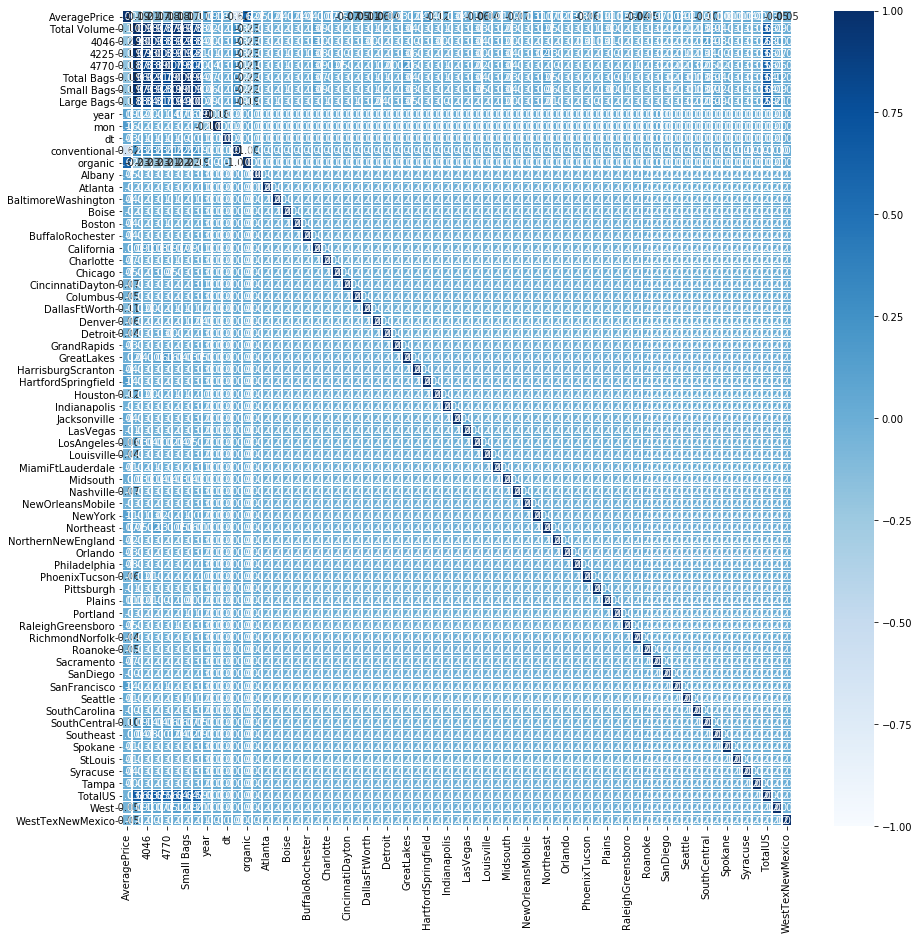

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [78]:
df.drop(["Date"], axis =1, inplace=True)

In [91]:
Y = df["AveragePrice"]

In [100]:
X = df.drop(["AveragePrice", "Small Bags", "Large Bags", "dt","Total Volume","4046","4225","4770"], axis = 1)

In [170]:
X = df[["organic"]]

In [163]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=20)

In [172]:
model = Sequential()
model.add(Dense(256, input_shape=(1,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense((1), activation='linear'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 256)               512       
_________________________________________________________________
dense_127 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_128 (Dense)            (None, 16)                4112      
_________________________________________________________________
dense_129 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 17        
Total params: 70,705
Trainable params: 70,705
Non-trainable params: 0
_________________________________________________________________


In [173]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 14599 samples, validate on 3650 samples
Epoch 1/5
14599/14599 [==============================] - 3s 175us/step - loss: 0.1499 - accuracy: 0.0107 - val_loss: 0.1013 - val_accuracy: 0.0112
Epoch 2/5
14599/14599 [==============================] - 1s 101us/step - loss: 0.1045 - accuracy: 0.0110 - val_loss: 0.1012 - val_accuracy: 0.0112
Epoch 3/5
14599/14599 [==============================] - 1s 91us/step - loss: 0.1034 - accuracy: 0.0110 - val_loss: 0.1003 - val_accuracy: 0.0112
Epoch 4/5
14599/14599 [==============================] - 1s 93us/step - loss: 0.1037 - accuracy: 0.0110 - val_loss: 0.1049 - val_accuracy: 0.0112
Epoch 5/5
14599/14599 [==============================] - 1s 93us/step - loss: 0.1041 - accuracy: 0.0110 - val_loss: 0.1041 - val_accuracy: 0.0112


### defining a way to find Mean Absolute Percentage Error

In [177]:
score = model.evaluate(X_test, y_test)
score[1] = 100 - 100*(score[1])
print(score[1])

3650/3650 [==============================] - 0s 32us/step
98.8767122849822
